# Read the slide first [slide link](https://docs.google.com/presentation/d/1tNf_athJ0ZRzgXezo0menh-shrzzAwUa/edit?usp=sharing&ouid=100216673605729372437&rtpof=true&sd=true)

## Read the description and images from this IPYNB file first [Java code link](https://drive.google.com/drive/folders/19qGA12SluVkTmivbE5SRnAHfUM_qp-o5?usp=sharing)

### Assume the Queue code is given

In [ ]:
import numpy as np

class DNode:
    def __init__(self, elem, next=None, prev=None):
        """Initializes a node with the given element, next, and previous pointers."""
        self.elem = elem
        self.next = next
        self.prev = prev

class QueueLL:
    def __init__(self):
        self.head = DNode(None)
        self.head.next = self.head.prev = self.head
        self._size = 0

    def is_empty(self):
        return self._size == 0

    def size(self):
        return self._size

    def enqueue(self, elem):
        new_node = DNode(elem)
        predecessor = self.head.prev
        successor = self.head

        new_node.prev = predecessor
        new_node.next = successor

        predecessor.next = new_node
        successor.prev = new_node

        self._size += 1

    def dequeue(self):
        if self.is_empty():
            raise IndexError("Underflow: Queue is empty")

        rem_node = self.head.next
        predecessor = self.head
        successor = rem_node.next

        predecessor.next = successor
        successor.prev = predecessor

        rem_node.next = rem_node.prev = None
        self._size -= 1
        return rem_node.elem

    def peek(self):
        if self.is_empty():
            raise IndexError("Underflow:Queue is empty")
        return self.head.next.elem

### Assume, the directed unweighted graph code using adjacency matrix is given

In [ ]:
class Graph:
    def __init__(self, num_vertices):
        """Initialize the graph with the given number of vertices."""
        self.num_vertices = num_vertices
        self.adj_matrix = np.zeros((num_vertices, num_vertices), dtype=int)

    def add_edges(self, edges):
        """Add edges to the adjacency matrix for a directed graph."""
        for u, v in edges:
            self.adj_matrix[u][v] = 1  # Mark the edge from u to v

    def print_matrix(self):
        """Print the adjacency matrix."""
        print("Adjacency Matrix:")
        for row in self.adj_matrix:
            print(row)

    def find_neighbors(self, vertex):
        """Find and print neighbors of a given vertex."""
        neighbors = []
        for i in range(self.num_vertices):
            if self.adj_matrix[vertex][i] == 1:
                neighbors.append(i)

        # Print neighbors manually
        print(f"\nNeighbors of vertex {vertex}: ", end="")
        for i in range(len(neighbors)):
            if i > 0:  # For all but the first neighbor, print a comma
                print(", ", end="")
            print(neighbors[i], end="")
        print()  # For new line after printing neighbors


### BFS code

#### Algorithm style1: with inf distance
```
BFS(V, E, s)
    for u in V
        u.d = inf
        u.p = NIL
    s.d = 0
    Q = new Queue
    Enqueue(Q, s)
    while Q not empty
        u = Dequeue(Q)
        for v in G.Adj[u]
            if v.d == inf      # v has not been "painted" yet
                v.d = u.d + 1
                v.p = u
                Enqueue(Q, v)
```

In [ ]:
def bfs(graph, source):
    #------------------------------------
    num_vertices = graph.num_vertices
    visited = [False] * num_vertices
    distance = [float('inf')] * num_vertices
    parent = [None] * num_vertices
    #------------------------------------

    queue = QueueLL()
    visited[source] = True
    distance[source] = 0
    queue.enqueue(source)
    #------------------------------------
    print(f"\nBFS starting from vertex {source}:")

    while not queue.is_empty():
        u = queue.dequeue()
        print(f"Visited {u} (Distance from source: {distance[u]})")

        for v in range(num_vertices):
            if graph.adj_matrix[u][v] == 1 and not visited[v]:
                visited[v] = True
                distance[v] = distance[u] + 1
                parent[v] = u
                queue.enqueue(v)

    return distance, parent

#### Algorithm style 2: with colors
```
BFS(G, s)
1  for each vertex u ∈ G.V – {s}
2      u.color ← WHITE
3      u.d ← ∞
4      u.π ← NIL
5  s.color ← GRAY
6  s.d ← 0
7  s.π ← NIL
8  Q ← ∅
9  ENQUEUE(Q, s)
10 while Q ≠ ∅
11     u ← DEQUEUE(Q)
12     for each v ∈ G.Adj[u]
13         if v.color == WHITE
14             v.color ← GRAY
15             v.d ← u.d + 1
16             v.π ← u
17             ENQUEUE(Q, v)
18     u.color ← BLACK

```

In [ ]:
def bfs_style2(graph, source):
    #------------------------------------
    WHITE, GRAY, BLACK = 0, 1, 2
    num_vertices = graph.num_vertices
    color = [WHITE] * num_vertices
    distance = [float('inf')] * num_vertices
    parent = [None] * num_vertices
    #------------------------------------

    queue = QueueLL()
    color[source] = GRAY
    distance[source] = 0
    queue.enqueue(source)

    #------------------------------------
    print(f"\nBFS starting from vertex {source}:")

    while not queue.is_empty():
        u = queue.dequeue()
        print(f"Visited {u} (Distance from source: {distance[u]})")

        for v in range(num_vertices):
            if graph.adj_matrix[u][v] == 1 and color[v] == WHITE: # neighbor and unvisited
                color[v] = GRAY
                distance[v] = distance[u] + 1
                parent[v] = u
                queue.enqueue(v)

        color[u] = BLACK # u is now fully explored

    return distance, parent

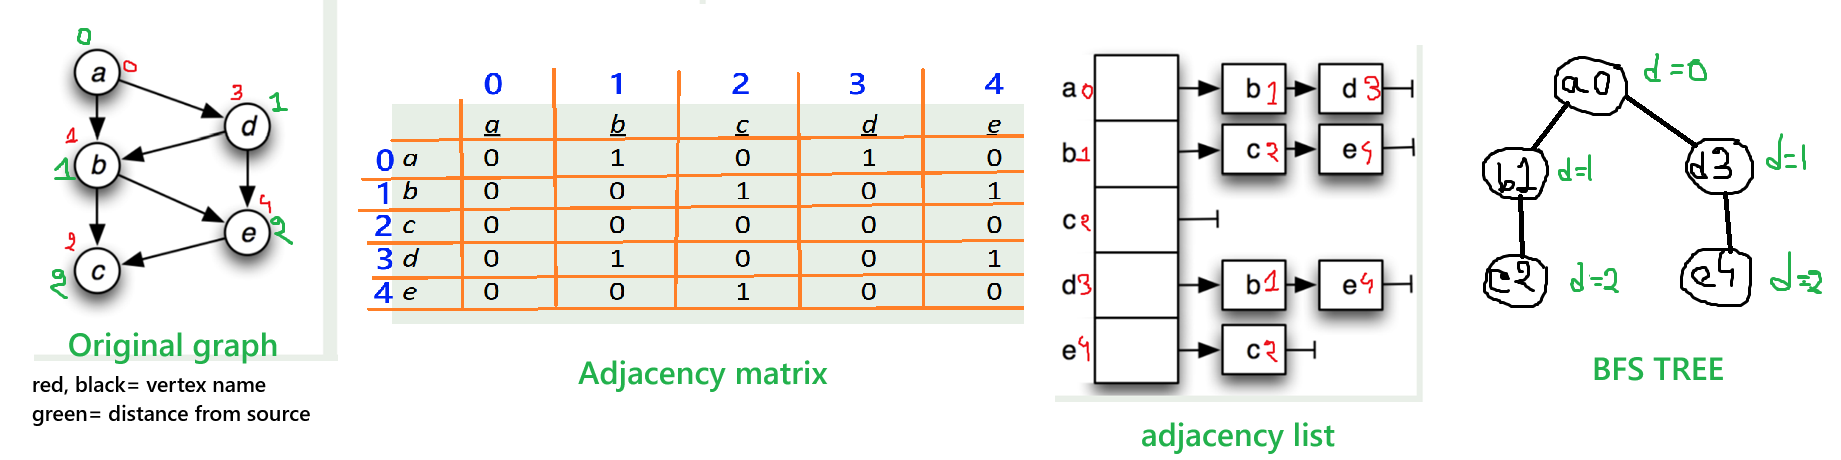

| Vertex | Distance from Source | Parent |
| ------ | -------------------- | ------ |
| 0      | 0                    | None   |
| 1      | 1                    | 0      |
| 2      | 2                    | 1      |
| 3      | 1                    | 0      |
| 4      | 2                    | 3      |


####  Driver code using using Adjacency matrix

In [ ]:
# Driver code using using Adjacency matrix
num_vertices = 5
edges = [
    (0, 1), (0, 3),
    (1, 2), (1, 4),
    (3, 1), (3, 4),
    (4, 2)
]

graph = Graph(num_vertices)
graph.add_edges(edges)
graph.print_matrix()

#############################################
print('----results using BFS style1---------------')
distances, parents = bfs(graph, 0)
print([(v, distances[v], parents[v]) for v in range(num_vertices)])


#############################################
print('----results using BFS style2----------------')
distances, parents = bfs_style2(graph, 0)
print([(v, distances[v], parents[v]) for v in range(num_vertices)])


Adjacency Matrix:
[0 1 0 1 0]
[0 0 1 0 1]
[0 0 0 0 0]
[0 1 0 0 1]
[0 0 1 0 0]
----results using BFS style1---------------

BFS starting from vertex 0:
Visited 0 (Distance from source: 0)
Visited 1 (Distance from source: 1)
Visited 3 (Distance from source: 1)
Visited 2 (Distance from source: 2)
Visited 4 (Distance from source: 2)
[(0, 0, None), (1, 1, 0), (2, 2, 1), (3, 1, 0), (4, 2, 1)]
----results using BFS style2----------------

BFS starting from vertex 0:
Visited 0 (Distance from source: 0)
Visited 1 (Distance from source: 1)
Visited 3 (Distance from source: 1)
Visited 2 (Distance from source: 2)
Visited 4 (Distance from source: 2)
[(0, 0, None), (1, 1, 0), (2, 2, 1), (3, 1, 0), (4, 2, 1)]


####  Driver code using using Adjacency matrix

### Printing a path from $s$ to $v$ (source to any destination, v)

- Assume we have performed a breadth-first search
- Then we have constructed a tree: a *breadth-first tree*
- Tree strucutre is represented in predecessor/parent information $u.\pi$
- Can be used to print path from source $s$ to any node $v$

#### Algorithm
```
Print-Path(G, s, v)
    if v == s
        print s
    elseif v.p == NIL
        print "no path from s to v"
    else
        Print-Path(G, s, v.p)    // parent--, going backward to source
        print v
```

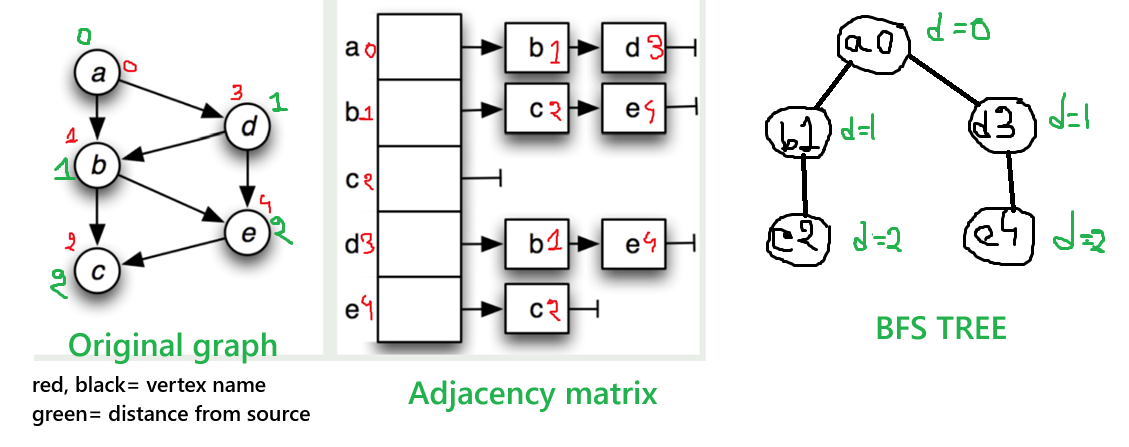|

In [ ]:
def print_path(parents, source, dest):
    """Recursively prints the path from source s to vertex v using parent dictionary."""
    if dest == source:
        print(source, end='')
    elif parents[dest] is None:
        print(f"No path from {source} to {dest}")
    else:
        print_path(parents, source, parents[dest])
        print(f" -> {dest}", end='')



print("Path from 0 to 2:")
print_path(parents, 0, 2)
print("\n")

print("Path from 0 to 4:")
print_path(parents, 0, 4)
print("\n")

print("Path from 0 to 3:")
print_path(parents, 0, 3)
print("\n")

Path from 0 to 2:
0 -> 1 -> 2

Path from 0 to 4:
0 -> 1 -> 4

Path from 0 to 3:
0 -> 3



### DFS

#### Algorithm
```
DFS(G)
{
    for each vertex u ∈ V[G]
    {
        color[u] = WHITE;
        prev[u] = NIL;
    }
    time = 0;
    for each vertex u ∈ V[G]
    {
        if (color[u] == WHITE)
            DFS-VISIT(G, u);
    }
}

DFS-VISIT(G, u)
{
    color[u] = GRAY;
    time = time + 1;
    d[u] = time;

    for each vertex v ∈ adj[u]
    {
        if (color[v] == WHITE)
        {
            prev[v] = u;
            DFS-VISIT(G, v);
        }
    }

    color[u] = BLACK;
    time = time + 1;
    f[u] = time; // f[u] = finishing time
}
```

In [ ]:
# Constants for vertex colors
# Vertex colors are represented by integers (WHITE = 0, GRAY = 1, BLACK = 2)
# instead of strings to reduce memory usage.
WHITE = 0
GRAY = 1
BLACK = 2


# DFS main function
def dfs(graph):
    num_vertices = graph.num_vertices
    colors = [WHITE] * num_vertices
    parents = [None] * num_vertices
    discovery_time = [0] * num_vertices
    finishing_time = [0] * num_vertices
    time_counter = 0

    for u in range(num_vertices):
        if colors[u] == WHITE:
            time_counter = dfs_visit(graph, u, colors, parents, discovery_time, finishing_time, time_counter)

    return discovery_time, finishing_time, parents


# DFS helper function
def dfs_visit(graph, u, colors, parents, discovery_time, finishing_time, time_counter):
    colors[u] = GRAY
    time_counter += 1
    discovery_time[u] = time_counter

    for v in range(graph.num_vertices):
        if graph.adj_matrix[u][v] == 1 and colors[v] == WHITE:
            parents[v] = u
            time_counter = dfs_visit(graph, v, colors, parents, discovery_time, finishing_time, time_counter)

    colors[u] = BLACK
    time_counter += 1
    finishing_time[u] = time_counter

    return time_counter

#### **In this image, green represents discovery time, blue represent finishing time**

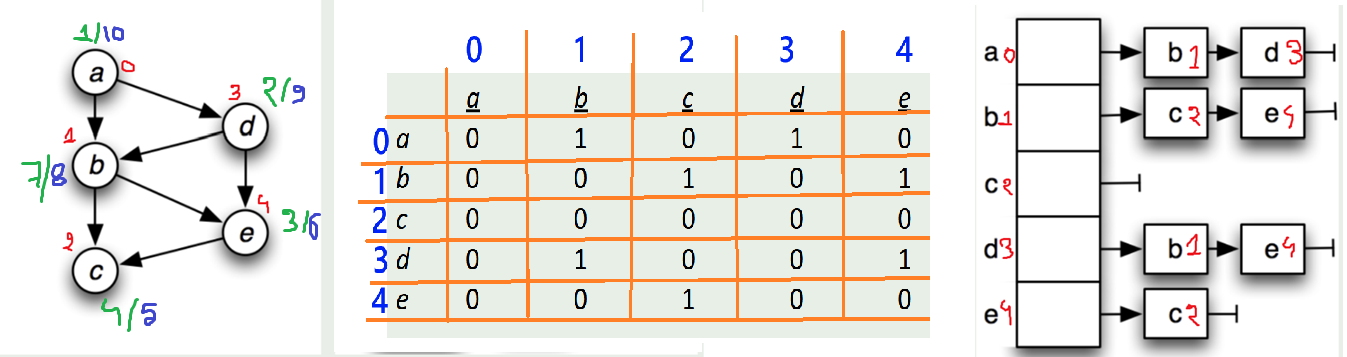

| Vertex | Discovery Time | Finishing Time | Parent |
|--------|----------------|----------------|--------|
| 0      | 1              | 10             | None   |
| 1      | 7              | 8              | 3      |
| 2      | 4              | 5              | 4      |
| 3      | 2              | 9              | 0      |
| 4      | 3              | 6              | 3      |


####  Driver code using using Adjacency list

In [ ]:
# ---------------- Driver Code ----------------
num_vertices = 5
edges_dfs1 = [
    (0, 1), (0, 3),
    (1, 2), (1, 4),
    (3, 1), (3, 4),
    (4, 2)
]

graph_dfs1 = Graph(num_vertices)
graph_dfs1.add_edges(edges_dfs1)

print("Graph (Adjacency Matrix):")
graph_dfs1.print_matrix()
print('-'*50)
#===============================================================

# Run DFS
d_time_dfs1, f_time_dfs1, parent_dfs1 = dfs(graph_dfs1)

# Display DFS results
print("\nDFS Results:")
for v in range(num_vertices):
    print(f"Vertex {v}: d = {d_time_dfs1[v]}, f = {f_time_dfs1[v]}, parent = {parent_dfs1[v]}")
print('-'*50)
#===============================================================

# Print specific paths
print("\nPath from 0 to 2:")
print_path(parent_dfs1, 0, 2)
print()

print("Path from 0 to 4:")
print_path(parent_dfs1, 0, 4)
print()

print("Path from 0 to 3:")
print_path(parent_dfs1, 0, 3)
print()

Graph (Adjacency Matrix):
Adjacency Matrix:
[0 1 0 1 0]
[0 0 1 0 1]
[0 0 0 0 0]
[0 1 0 0 1]
[0 0 1 0 0]
--------------------------------------------------

DFS Results:
Vertex 0: d = 1, f = 10, parent = None
Vertex 1: d = 2, f = 7, parent = 0
Vertex 2: d = 3, f = 4, parent = 1
Vertex 3: d = 8, f = 9, parent = 0
Vertex 4: d = 5, f = 6, parent = 1
--------------------------------------------------

Path from 0 to 2:
0 -> 1 -> 2
Path from 0 to 4:
0 -> 1 -> 4
Path from 0 to 3:
0 -> 3
